In [319]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz, simps
from scipy.optimize import curve_fit
import seaborn as sns
import statistics

In [342]:
n=100
m=10

In [321]:
#for a fixed number of steps i.e. 100 from -50 to 50 with a step of 1

In [322]:
x= np.arange(-50,50,1)
mean = statistics.mean(x)
sd = statistics.stdev(x)

Total number of steps: 100


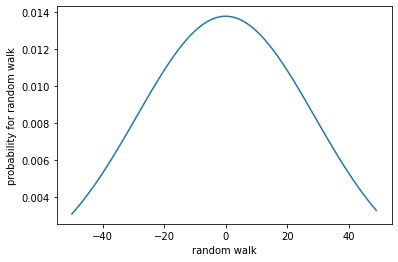

In [323]:
plt.plot(x, norm.pdf(x,mean,sd))
plt.xlabel('random walk')
plt.ylabel('probability for random walk')
print('Total number of steps: 100')

probability for x>m from the above graph where m=10: 0.3195618447964737


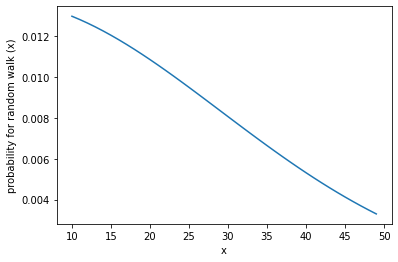

In [324]:
y= np.arange(10,50,1)
plt.plot(y, norm.pdf(y,mean,sd))
plt.xlabel('x')
plt.ylabel('probability for random walk (x)')
print('probability for x>m from the above graph where m=10: {:18.16f}'.format(trapz(norm.pdf(y,mean,sd), y)))

In [325]:
#for a random walk of 100 steps i.e. n=100

In [326]:
def random_walk(num_steps, x_start=0):
    a_steps = np.random.randint(2, size=num_steps)
    b_steps = a_steps * 2 - 1
    return x_start + np.cumsum(b_steps)

In [327]:
k = 100
path = np.zeros(2*k)
n=100

In [328]:
for i in range(n):
    p = random_walk(n, k)
    path[p[n-1]]+=1

In [329]:
prob = path/(100)    

In [330]:
index = np.zeros(2*k)

for i in range(200):
    index[i]=i-100

total probablity : 1.0000000000000002


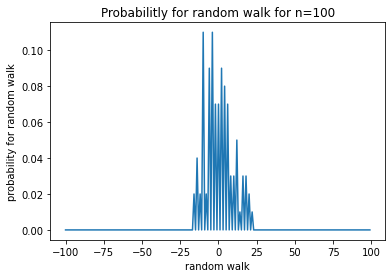

In [331]:
plt.plot(index,prob)
plt.xlabel('random walk')
plt.ylabel('probability for random walk')
plt.title('Probabilitly for random walk for n=100')
print("total probablity : " + str(sum(prob)))

In [332]:
#let m=10 i.e. number of right walks
m=10

In [333]:
print("probablity for 10 right walks: " + str(prob[110]))

probablity for 10 right walks: 0.03


In [334]:
print("probablity for m>10 right walks: " + str(np.sum(prob[110:])))

probablity for m>10 right walks: 0.18


In [335]:
m_prob= np.zeros(91)

for i in range(200):
    if i>=110:
        m_prob[i-110]=prob[i]

In [336]:
index1 = np.zeros(91)

for i in range(90):
    index1[i]=i+10

Text(0.5, 1.0, 'Probabilitly for random walk for m>10')

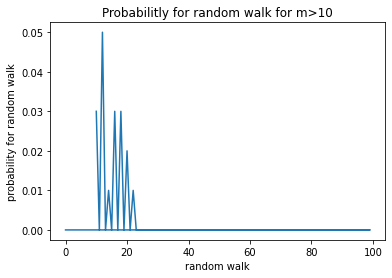

In [337]:
plt.plot(index1,m_prob)
plt.xlabel('random walk')
plt.ylabel('probability for random walk')
plt.title('Probabilitly for random walk for m>10')

In [338]:
#Best fit using scipy optimisation

In [339]:
x_val = np.array(range(0,200))

In [340]:
def gaussian_curve(x, a, b): 
    y = (1/(a * np.sqrt(2 * np.pi))) * np.exp((-1/2) * np.power(((x-b)/a) , 2))
    return y
param, param_cov = curve_fit(gaussian_curve , x_val, prob)
sd,mean = param
print("sd : " +str(sd) + ",MEAN : "+str(mean))

sd : 21.18757963223521,MEAN : -85.79947681175629


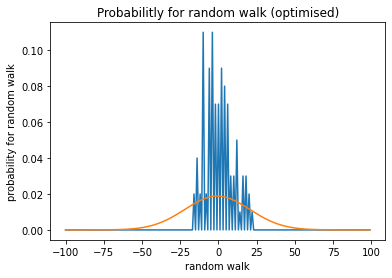

In [341]:
plt.plot(index,prob)
plt.xlabel('random walk')
plt.ylabel('probability for random walk')
plt.title('Probabilitly for random walk (optimised)')
plt.plot(x_val-100, norm.pdf(x_val, mean + 185, sd))